In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [42]:

base_dir = "10_food_classes_all_data"

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')  
validation_dir = os.path.join(base_dir, 'val')  

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)  
val_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(224, 224),
                                                    batch_size=20, 
                                                    class_mode='binary',
                                                    classes=['fried_rice', 'hamburger'],
                                                    shuffle=True)


validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size=(224, 224),
                                                        batch_size=20, 
                                                        class_mode='binary',
                                                        classes=['fried_rice', 'hamburger'],
                                                        shuffle=True)
testing_generator = test_datagen.flow_from_directory(test_dir, 
                                                        target_size=(224, 224),
                                                        batch_size=20, 
                                                        class_mode='binary',
                                                        classes=['fried_rice', 'hamburger'],
                                                        shuffle=True)


Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


Found 500 images belonging to 2 classes.


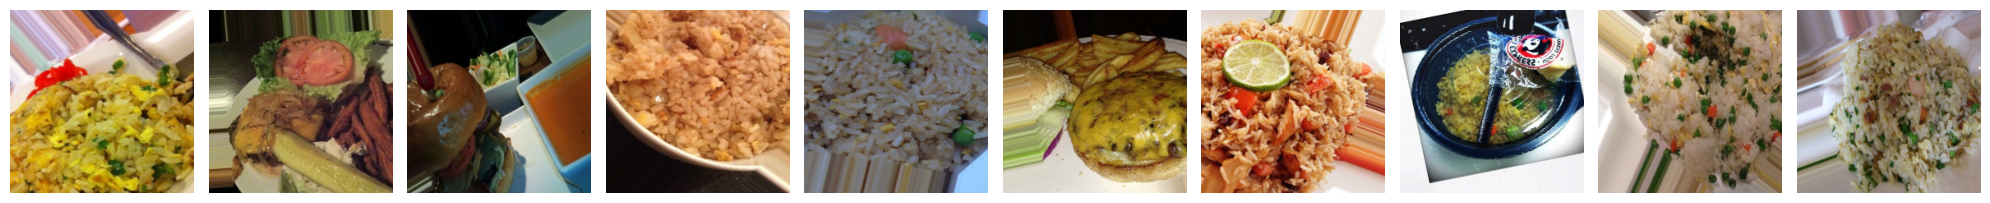

In [65]:
# Візуалізація деяких зображень
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(train_generator)
plot_images(images[:10]) 

In [63]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [64]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=5)

Epoch 1/5
60/60 [==============================] - 45s 727ms/step - loss: 0.9073 - accuracy: 0.5183 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 2/5
60/60 [==============================] - 43s 707ms/step - loss: 0.6932 - accuracy: 0.5117 - val_loss: 0.6908 - val_accuracy: 0.5067
Epoch 3/5
60/60 [==============================] - 43s 706ms/step - loss: 0.6876 - accuracy: 0.5592 - val_loss: 0.6657 - val_accuracy: 0.5567
Epoch 4/5
60/60 [==============================] - 42s 702ms/step - loss: 0.6617 - accuracy: 0.6217 - val_loss: 0.6384 - val_accuracy: 0.6333
Epoch 5/5
60/60 [==============================] - 43s 708ms/step - loss: 0.6310 - accuracy: 0.6525 - val_loss: 0.5682 - val_accuracy: 0.7300


In [46]:
# Оцінка моделі на тестових даних
test_loss, test_accuracy = model.evaluate(testing_generator)
print(f"Test accuracy: {test_accuracy}")


25/25 [==============================] - 2s 83ms/step - loss: 0.5915 - accuracy: 0.7320
Test accuracy: 0.7319999933242798


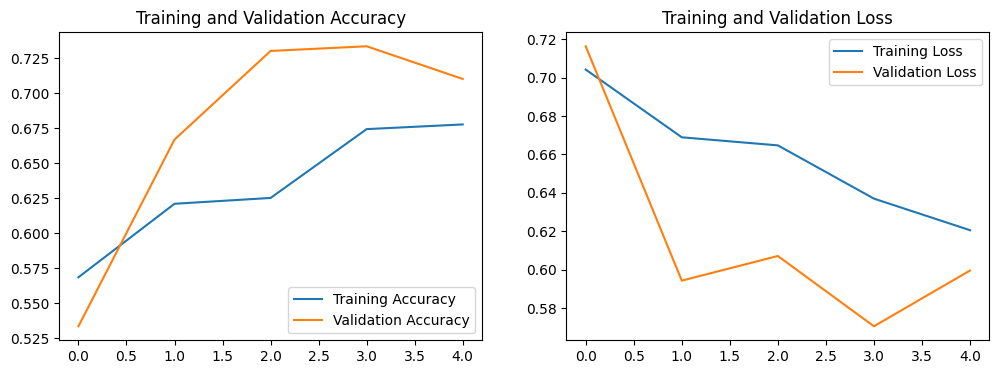

In [47]:
import matplotlib.pyplot as plt

# Візуалізація точності
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Візуалізація втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
